In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read file and see contents
chess = pd.read_csv('../input/chess/games.csv')
chess.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


<function matplotlib.pyplot.show(close=None, block=None)>

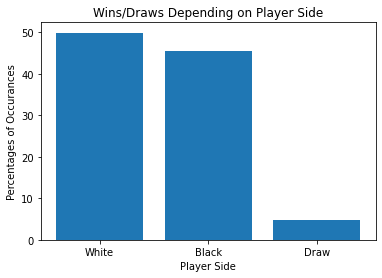

In [3]:
#Bar Graph showing percentages of white wins versus black wins

#Find out how many total white wins/black wins/draws there are
totalwins = (chess['winner'].value_counts()['white'] + 
             chess['winner'].value_counts()['black'] + 
             chess['winner'].value_counts()['draw'])

#Make a dataframe for a bar graph
wins = {'White':chess['winner'].value_counts()['white'] / totalwins * 100,
        'Black':chess['winner'].value_counts()['black'] / totalwins * 100,
        'Draw':chess['winner'].value_counts()['draw'] / totalwins * 100}

#Create the bar graph
color = list(wins.keys())
winvalues = list(wins.values())

winsbar = plt.figure()
plt.bar(color,winvalues)
plt.xlabel("Player Side")
plt.ylabel("Percentages of Occurances")
plt.title("Wins/Draws Depending on Player Side")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

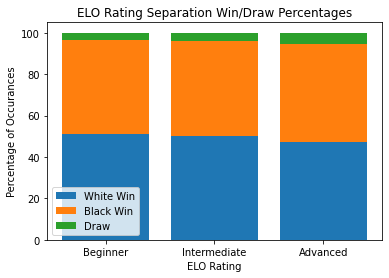

In [4]:
#Percentage composition bar graph labeling ELO rating and win percentages

#Separate each game based on ELO (has duplicates)
#b is beginner, i is intermediate, and a is advanced
chessbdupe = chess.loc[((chess['white_rating'] >= 0) & (chess['white_rating'] < 1400) & (chess['rated'] == 1)) 
                          | ((chess['black_rating'] >= 0) & (chess['black_rating'] < 1400) & (chess['rated'] == 1))]

chessidupe = chess.loc[((chess['white_rating'] >= 1400) & (chess['white_rating'] < 2000) & (chess['rated'] == 1)) 
                           | ((chess['black_rating'] >= 1400) & (chess['black_rating'] < 2000) & (chess['rated'] == 1))]

chessadupe = chess.loc[((chess['white_rating'] >= 2000) & (chess['rated'] == 1)) 
                             | ((chess['black_rating'] >= 2000) & (chess['rated'] == 1))]



#Remove duplicates
chessb = chessbdupe.drop_duplicates()
chessi = chessidupe.drop_duplicates()
chessa = chessadupe.drop_duplicates()

#Find out total games for each section
totalb = (chessb['winner'].value_counts()['white'] + 
             chessb['winner'].value_counts()['black'] + 
             chessb['winner'].value_counts()['draw'])
        
totali = (chessi['winner'].value_counts()['white'] + 
             chessi['winner'].value_counts()['black'] + 
             chessi['winner'].value_counts()['draw'])

totala = (chessa['winner'].value_counts()['white'] + 
             chessa['winner'].value_counts()['black'] + 
             chessa['winner'].value_counts()['draw'])

#Creating the stacked bar graph
x = ['Beginner', 'Intermediate', 'Advanced']
y1 = np.array([(chessb['winner'].value_counts()['white'] / totalb * 100),
      (chessi['winner'].value_counts()['white'] / totali * 100),
      (chessa['winner'].value_counts()['white'] / totala * 100)])
y2 = np.array([(chessb['winner'].value_counts()['black'] / totalb * 100),
      (chessi['winner'].value_counts()['black'] / totali * 100),
      (chessa['winner'].value_counts()['black'] / totala * 100)])
y3 = np.array([(chessb['winner'].value_counts()['draw'] / totalb * 100),
      (chessi['winner'].value_counts()['draw'] / totali * 100),
      (chessa['winner'].value_counts()['draw'] / totala * 100)])

plt.bar(x, y1)
plt.bar(x, y2, bottom = y1)
plt.bar(x, y3, bottom = y1 + y2)
plt.xlabel("ELO Rating")
plt.ylabel("Percentage of Occurances")
plt.legend(["White Win","Black Win","Draw"])
plt.title("ELO Rating Separation Win/Draw Percentages")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

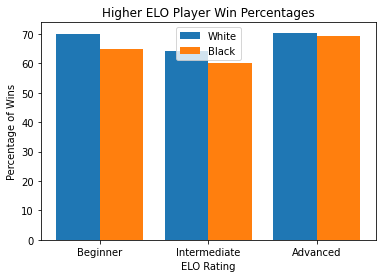

In [5]:
#Multiple Bar Chart detailing percentage of higher rated wins

#Filter games where white rating is higher or black rating is higher
chessbwhite = chessb.loc[chessb['white_rating'] > chessb['black_rating']]
chessbblack = chessb.loc[chessb['black_rating'] > chessb['white_rating']]

chessiwhite = chessi.loc[chessi['white_rating'] > chessi['black_rating']]
chessiblack = chessi.loc[chessi['black_rating'] > chessi['white_rating']]

chessawhite = chessa.loc[chessa['white_rating'] > chessa['black_rating']]
chessablack = chessa.loc[chessa['black_rating'] > chessa['white_rating']]

#Create the multiple bar chart
ywhite = np.array([(chessbwhite['winner'].value_counts()['white'] / chessbwhite.shape[0] * 100),
      (chessiwhite['winner'].value_counts()['white'] / chessiwhite.shape[0] * 100),
      (chessawhite['winner'].value_counts()['white'] / chessawhite.shape[0] * 100)])
zblack = np.array([(chessbblack['winner'].value_counts()['black'] / chessbblack.shape[0] * 100),
      (chessiblack['winner'].value_counts()['black'] / chessiblack.shape[0] * 100),
      (chessablack['winner'].value_counts()['black'] / chessablack.shape[0] * 100)])

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, ywhite, 0.4, label = 'White')
plt.bar(x_axis + 0.2, zblack, 0.4, label = 'Black')

plt.xticks(x_axis, x)
plt.xlabel("ELO Rating")
plt.ylabel("Percentage of Wins")
plt.title("Higher ELO Player Win Percentages")
plt.legend()
plt.show

In [6]:
#Table showing most popular opening moves

#Seperate unrated games from rated games
chessrated = chess.loc[(chess['rated'] == 1)]

#Split the text from opening moves
chessratedsplit = chessrated['moves'].str.split(' ', n=2, expand=True)
chessopenings = chessratedsplit.drop([2], axis = 1)
chessopenings.rename(columns={0:'White_Opening_Move', 1:'Black_Opening_Move'}, inplace=True)

#Aggregate opening moves
whiteopeningtable = pd.pivot_table(chessopenings, columns=['White_Opening_Move'], aggfunc='size')
blackopeningtable = pd.pivot_table(chessopenings, columns=['Black_Opening_Move'], aggfunc='size')

#Get top 5 opening moves
popularwhite = whiteopeningtable.nlargest(5)
popularblack = blackopeningtable.nlargest(5)

popularwhite, popularblack

(White_Opening_Move
 e4     10162
 d4      3740
 c4       553
 Nf3      516
 e3       345
 dtype: int64,
 Black_Opening_Move
 e5     5567
 d5     2981
 c5     2312
 e6     1775
 Nf6    1356
 dtype: int64)